#### Regression Analysis

## Types of Regression Analysis

##### Compare the performance of:  
  a. Linear regression  
  b. Polynomial regression  
  c. Lasso regression  
  Use a real or synthetic dataset to fit these models and compare their mean squared errors.  
  Steps   
      a. Use sklearn for implementation.  
      b. Use matplotlib to visualize results.


In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [31]:
# Generate synthetic data
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1,1)
y = 2 * X.squeeze()**2 + 3 * X.squeeze() + np.random.randn(100) * 2  # Quadratic function with noise


In [32]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [33]:
# Fit a Linear Model 
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [34]:
# Predict
y_pred_linear = linear_model.predict(X_test)

In [35]:
# Fit a Polynomial Regression
poly_model = make_pipeline(PolynomialFeatures(degree=5), LinearRegression())
poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

In [36]:
# Predict
y_pred_poly = poly_model.predict(X_test)

In [37]:
# Fir a Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [38]:
# Predict
y_pred_lasso = lasso_model.predict(X_test)

In [39]:
# Compute Mean Squared Errors
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_poly = mean_squared_error(y_test, y_pred_poly)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

In [40]:
print(f"Linear Regression MSE: {mse_linear:.2f}")
print(f"Polynomial Regression MSE: {mse_poly:.2f}")
print(f"Lasso Regression MSE: {mse_lasso:.2f}")

Linear Regression MSE: 30.05
Polynomial Regression MSE: 2.60
Lasso Regression MSE: 29.83


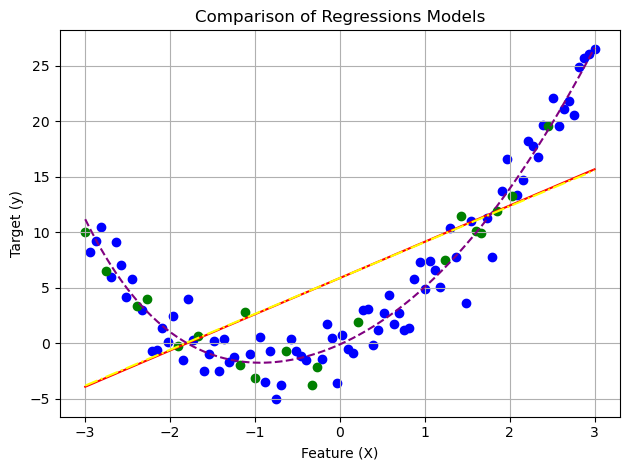

In [41]:
# Visualization
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, color="green", label="Testing Data")

plt.plot(X_plot, linear_model.predict(X_plot), color="red", linestyle="-", label="Linear Regression")
plt.plot(X_plot, poly_model.predict(X_plot), color="purple", linestyle="--", label="Polynomial Regression (degree=5)")
plt.plot(X_plot, lasso_model.predict(X_plot), color="yellow", linestyle="-.", label="Lasso Regression")

plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Comparison of Regressions Models")
plt.legend
plt.tight_layout()
plt.grid(True)
plt.show()
